- Test fixiere parameter
- Test parameter change

In [25]:
# Add the 'src' as root folder, to find other modules in the project
import sys
sys.path.append("../../")

In [26]:
#Import packages
import matplotlib.pyplot as plt
import numpy as np
import torch

from matplotlib.animation import FuncAnimation
from simulator.swing_equation import Swing_4_Equation, Swing_5_Equation

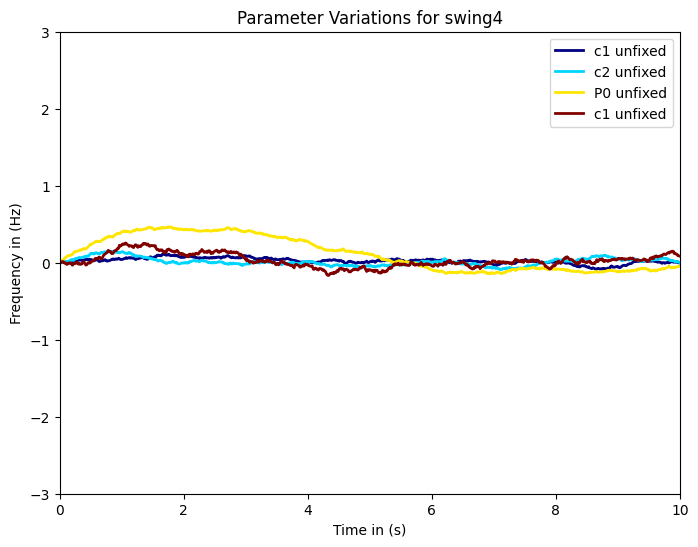

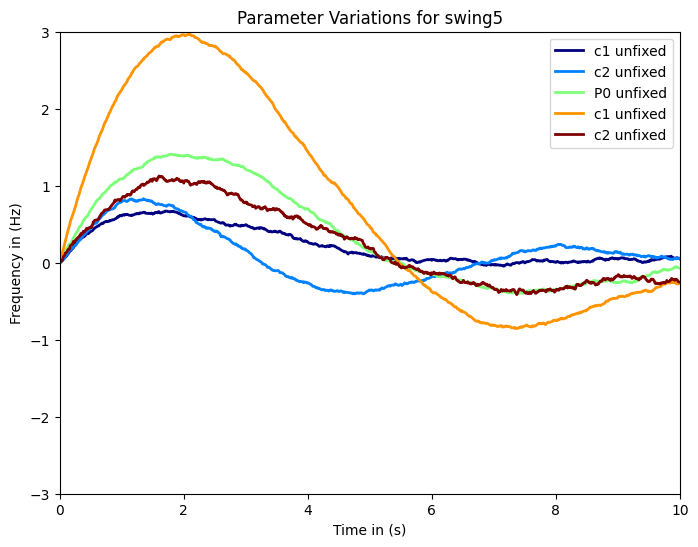

In [27]:
import os


def create_combined_animation(parameters_list, parameter_values_list, model_name, save_path):
    '''
    Create a combined animation GIF displaying the variations of parameters for a given model.

    Parameters:
    - parameters_list (list): A list containing arrays of parameter values for each unfixed parameter. Each array represents the parameter values over time.
    - parameter_values_list (list): A list of strings indicating the values of each unfixed parameter.
    - model_name (str): Name of the model for which the animation is created.
    - save_path (str): Full path to the directory where the output GIF file will be saved.

    Returns:
    None
    '''
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(-3, 3)
    ax.set_xlabel('Time in (s)')
    ax.set_ylabel('Frequency in (Hz)')
    lines = []
    colors = plt.cm.jet(np.linspace(0, 1, len(parameters_list)))
    unfixed_params = ['c1', 'c2', 'P0', 'P1', 'epsilon']  
    unfixed_params2 = ['c1', 'c2', 'P_const', 'epsilon'] 

    for i, parameters in enumerate(parameters_list):
        if i < 3: 
            line, = ax.plot([], [], lw=2, color=colors[i], label=f'{unfixed_params[i]} unfixed')
        else: 
            line, = ax.plot([], [], lw=2, color=colors[i], label=f'{unfixed_params2[i-3]} unfixed')
        lines.append(line)
    ax.legend(loc='upper right')
    ax.set_title(f'Parameter Variations for {model_name}') 

    def init():
        for line in lines:
            line.set_data([], [])
        return lines

    def update(frame):
        for i, line in enumerate(lines):
            line.set_data(np.arange(0, 10, 0.01), parameters_list[i][frame])
        return lines

    ani = FuncAnimation(fig, update, frames=len(parameters_list[0]), init_func=init, blit=True)
    ani.save(f'{save_path}/combined_simulation_{model_name}.gif', writer='pillow', fps=10)

# Define the save path
dir_path_animation = '../../../results/simulator/animation'
os.makedirs(dir_path_animation, exist_ok=True)

# Parameter variations for Swing-4 equation
c1_values_4 = np.linspace(0.1, 1.0, 200)
c2_values_4 = np.linspace(0.1, 1.0, 200)
P_const_values_4 = np.linspace(0.05, 0.5, 200)
epsilon_values_4 = np.linspace(0.01, 0.1, 200)

# Parameter variations for Swing-5 equation
c1_values_5 = np.linspace(0.1, 1.0, 200)
c2_values_5 = np.linspace(0.1, 1.0, 200)
P0_values_5 = np.linspace(0.05, 0.5, 200)
P1_values_5 = np.linspace(0.01, 0.03, 200)
epsilon_values_5 = np.linspace(0.01, 0.1, 200)

# Create Animation GIFs for Swing-4 equation parameters
parameters_list_4 = [
    [Swing_4_Equation().simulate(torch.tensor([c1, 0.5, 0.1, 0.05])).numpy() for c1 in c1_values_4],
    [Swing_4_Equation().simulate(torch.tensor([0.5, c2, 0.1, 0.05])).numpy() for c2 in c2_values_4],
    [Swing_4_Equation().simulate(torch.tensor([0.5, 0.4, P_const, 0.05])).numpy() for P_const in P_const_values_4],
    [Swing_4_Equation().simulate(torch.tensor([0.5, 0.4, 0.1, epsilon])).numpy() for epsilon in epsilon_values_4]
]

parameter_values_list_4 = [f'c1={c1}' for c1 in c1_values_4] + [f'c2={c2}' for c2 in c2_values_4] + [f'P_const={P_const}' for P_const in P_const_values_4] + ['epsilon']

create_combined_animation(parameters_list_4, parameter_values_list_4, 'swing4', dir_path_animation)

# Create Animation GIFs for Swing-5 equation parameters
parameters_list_5 = [
    [Swing_5_Equation().simulate(torch.tensor([c1, 0.5, 0.1, 0.01, 0.05])).numpy() for c1 in c1_values_5],
    [Swing_5_Equation().simulate(torch.tensor([0.5, c2, 0.1, 0.01, 0.05])).numpy() for c2 in c2_values_5],
    [Swing_5_Equation().simulate(torch.tensor([0.5, 0.4, P0, 0.01, 0.05])).numpy() for P0 in P0_values_5],
    [Swing_5_Equation().simulate(torch.tensor([0.5, 0.4, 0.1, P1, 0.05])).numpy() for P1 in P1_values_5],
    [Swing_5_Equation().simulate(torch.tensor([0.5, 0.4, 0.1, 0.01, epsilon])).numpy() for epsilon in epsilon_values_5]
]

parameter_values_list_5 = [f'c1={c1}' for c1 in c1_values_5] + [f'c2={c2}' for c2 in c2_values_5] + [f'P0={P0}' for P0 in P0_values_5] + [f'P1={P1}' for P1 in P1_values_5] + ['epsilon']

create_combined_animation(parameters_list_5, parameter_values_list_5, 'swing5', dir_path_animation)
